In [7]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib as plt

df = pd.read_csv("/kaggle/input/spam-email-dataset/emails.csv")
df["spam_text"] = df.spam.apply(lambda x:"spam" if x==1 else "ham")

In [2]:
df.head(5)

text  spam spam_text
0  Subject: naturally irresistible your corporate...     1      spam
1  Subject: the stock trading gunslinger  fanny i...     1      spam
2  Subject: unbelievable new homes made easy  im ...     1      spam
3  Subject: 4 color printing special  request add...     1      spam
4  Subject: do not have money , get software cds ...     1      spam

In [3]:
print(df.isna().sum())
df.drop_duplicates(inplace=True)

text         0
spam         0
spam_text    0
dtype: int64


# EDA

([<matplotlib.patches.Wedge at 0x79256f951c90>,
 [Text(-0.8046353619747643, 0.7500412883700072, 'ham'),
  Text(0.8046353619747643, -0.7500412883700073, 'spam')])

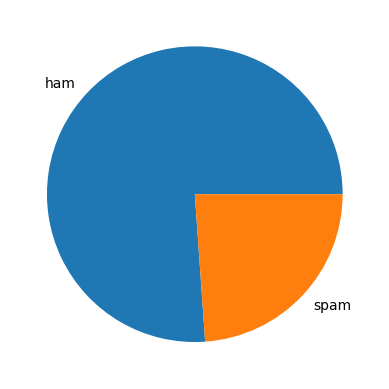

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(df['spam_text'].value_counts(),labels=df['spam_text'].value_counts().index)

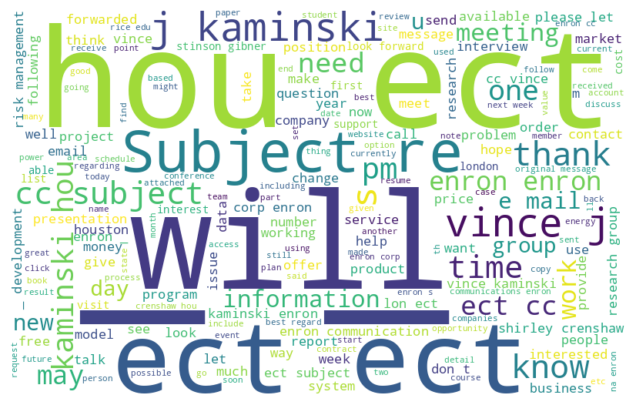

In [9]:
from wordcloud import WordCloud
text=' '.join(df.text)
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Procresing

In [7]:
x = "Detecting SPAM mails in 10 steps with the help of artificial intelligence."
print(x)
x = x.lower()
print(x)
x = re.sub(r"[^a-zA-Z]", " ", x)
print(x)
x = word_tokenize(x)
print(x)
stop_words=set(stopwords.words("english"))
x = [a for a in x if a not in stop_words]
print(x)

Detecting SPAM mails in 10 steps with the help of artificial intelligence.
detecting spam mails in 10 steps with the help of artificial intelligence.
detecting spam mails in    steps with the help of artificial intelligence 
['detecting', 'spam', 'mails', 'in', 'steps', 'with', 'the', 'help', 'of', 'artificial', 'intelligence']
['detecting', 'spam', 'mails', 'steps', 'help', 'artificial', 'intelligence']


In [19]:
#tüm harfleri küçültme
df["txt"]=df.text.apply(lambda x:x.lower())

#noktalama işaretleri ve sayıları kaldırıyoruz
df.txt=df.txt.apply(lambda x:re.sub(r"[^a-zA-Z]", " ", x))

#kelimeleri köklerine indirgeme
df.txt=df.txt.apply(lambda x:word_tokenize(x))

#anlamsız kelimeleri çıkartıp kelimeleri liste formatına getirme
stop_words=set(stopwords.words("english"))
df.txt = df.txt.apply(lambda x:[a for a in x if a not in stop_words])

In [23]:
text

'subject hello guys bugging completed questionnaire one page bio statement thoughts business edu new economy records incorrect please ship responses want put everything together next week ship back everyone questionnaire attached well copies bio pages michael froehls two somewhat different approaches idea latter introduce panelists give background approaching issues discuss also provide copies attendees use material personal introductions opening panel discussions thanks look forward seeing two weeks john waco background mf doc jmartinbiosketch doc questionnaire doc john martin carr p collins chair finance finance department baylor university po box waco tx office fax j martin baylor edu web http hsb baylor edu html martinj home html subject sacramento weather station fyi forwarded mike roberts hou ect scott tholan enron pm mark tawney hou ect ect gary taylor hou ect ect mike roberts hou ect ect cc chris clark na enron enron subject sacramento weather station hey guys talking contracto

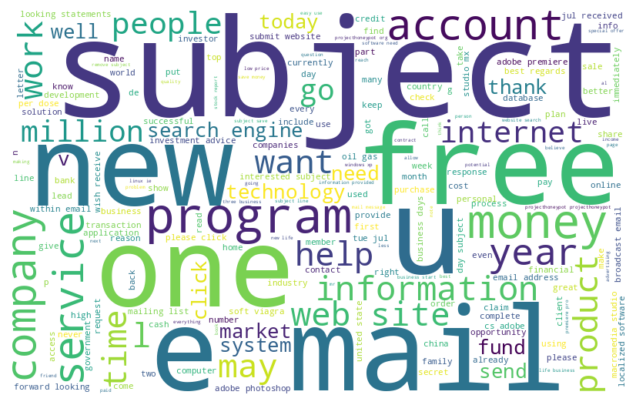

In [21]:
#world cloud of spam
df_1=df[df.spam==1]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

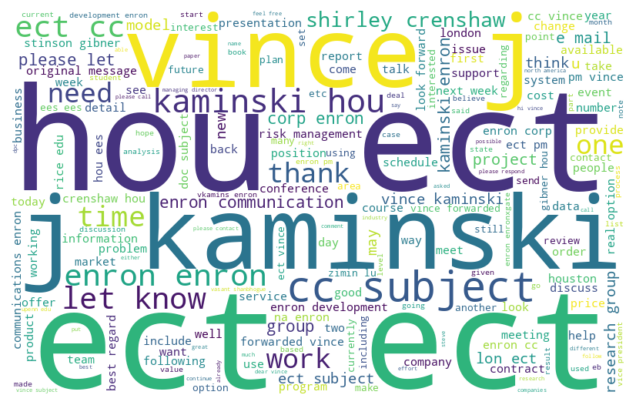

In [22]:
df_1=df[df.spam==0]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

countvector=CountVectorizer()
sentence_as_x=[' '.join(tokens) for tokens in df['txt']]

X=countvector.fit_transform(sentence_as_x)

NameError: name 'x' is not defined

In [26]:
from sklearn.model_selection import train_test_split
y=df.spam
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train.toarray()
X_test=X_test.toarray()


In [33]:
pd.DataFrame(X_train

NameError: name 'X_tt' is not defined

In [27]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

Learning rate set to 0.019686
0:	learn: 0.6510407	total: 172ms	remaining: 2m 51s
1:	learn: 0.6145517	total: 270ms	remaining: 2m 14s
2:	learn: 0.5816154	total: 368ms	remaining: 2m 2s
3:	learn: 0.5525953	total: 471ms	remaining: 1m 57s
4:	learn: 0.5253304	total: 573ms	remaining: 1m 54s
5:	learn: 0.4989993	total: 676ms	remaining: 1m 51s
6:	learn: 0.4759059	total: 776ms	remaining: 1m 50s
7:	learn: 0.4542419	total: 875ms	remaining: 1m 48s
8:	learn: 0.4358819	total: 975ms	remaining: 1m 47s
9:	learn: 0.4187694	total: 1.07s	remaining: 1m 46s
10:	learn: 0.4030582	total: 1.18s	remaining: 1m 46s
11:	learn: 0.3901680	total: 1.28s	remaining: 1m 45s
12:	learn: 0.3763910	total: 1.38s	remaining: 1m 45s
13:	learn: 0.3642256	total: 1.48s	remaining: 1m 44s
14:	learn: 0.3526415	total: 1.58s	remaining: 1m 43s
15:	learn: 0.3424620	total: 1.68s	remaining: 1m 43s
16:	learn: 0.3318177	total: 1.78s	remaining: 1m 42s
17:	learn: 0.3226177	total: 1.88s	remaining: 1m 42s
18:	learn: 0.3136555	total: 1.98s	remaining: 

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [29]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [30]:
clf_pred =clf.predict(X_test)
cat_pred = cat.predict(X_test)
mlp_pred = mlp.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score
print("From clf model",accuracy_score(y_test,clf_pred))
print("From cat",accuracy_score(y_test,cat_pred))
print("From clf model",accuracy_score(y_test,mlp_pred))


From clf model 0.9438103599648815
From cat 0.9833187006145742
From clf model 0.9894644424934153


Matrice de confusion:
[[835   8]
 [ 11 285]]
True Positives (TP) : 285
False Positives (TN) : 835


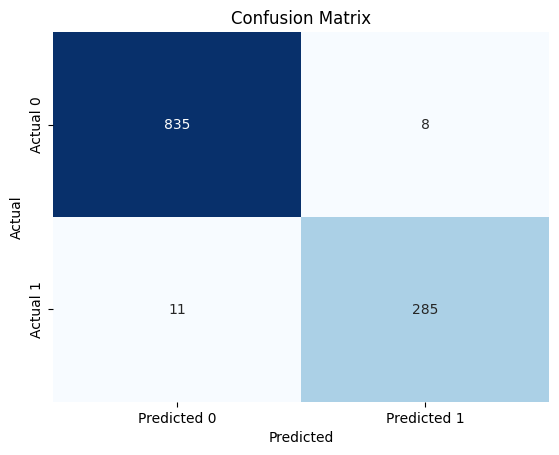

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, cat_pred)

# Extraire les valeurs TP et TN de la matrice de confusion
tn, fp, fn, tp = conf_matrix.ravel()

print("Matrice de confusion:")
print(conf_matrix)
print("True Positives (TP) :", tp)
print("False Positives (TN) :", tn)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Matrice de confusion:
[[837   6]
 [ 58 238]]
True Positives (TP) : 238
False Positives (TN) : 837


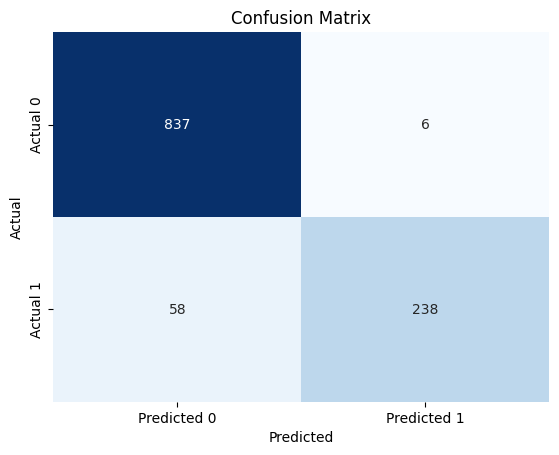

In [37]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, clf_pred)

# Extraire les valeurs TP et TN de la matrice de confusion
tn, fp, fn, tp = conf_matrix.ravel()

print("Matrice de confusion:")
print(conf_matrix)
print("True Positives (TP) :", tp)
print("False Positives (TN) :", tn)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Matrice de confusion:
[[841   2]
 [ 10 286]]
True Positives (TP) : 286
False Positives (TN) : 841


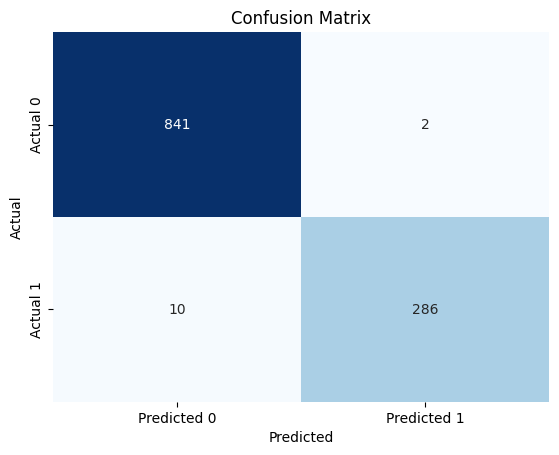

In [38]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, mlp_pred)

# Extraire les valeurs TP et TN de la matrice de confusion
tn, fp, fn, tp = conf_matrix.ravel()

print("Matrice de confusion:")
print(conf_matrix)
print("True Positives (TP) :", tp)
print("False Positives (TN) :", tn)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()